In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
register_matplotlib_converters()

# Data

In [3]:
os.chdir("..")

In [4]:
forecast_1 = pd.read_csv('data/wind_challenge/Dataset1_forecast.csv')

In [5]:
forecast_1['Time'] = pd.to_datetime(forecast_1['Time'])

# Wind speed

In [7]:
speed = forecast_1.copy()
speed = speed[['Time', 'windSpeed (m/s)']]
speed = speed.set_index('Time')

In [22]:
speed = speed.asfreq('1h')

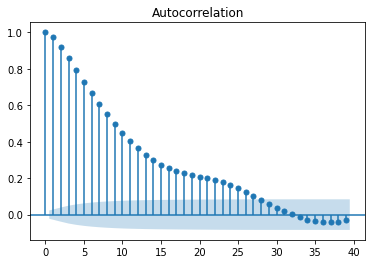

In [13]:
plot_acf(speed['windSpeed (m/s)'])
plt.show()

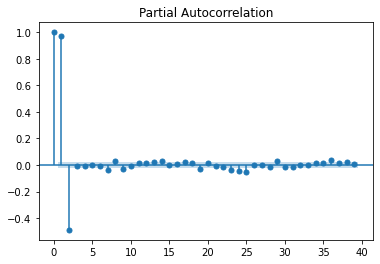

In [14]:
plot_pacf(speed['windSpeed (m/s)'])
plt.show()

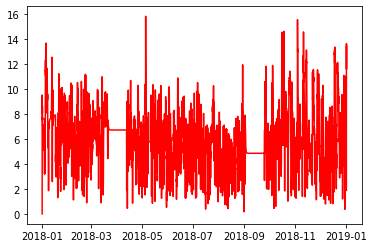

In [23]:
model = ARIMA(speed, order=(2,1,2))
results = model.fit()
plt.plot(results.fittedvalues, color='red')

In [24]:
forecast_1

,Time,windSpeed (m/s),windDic (degree)
0,2018-01-01 00:00:00,9.50241,303.854
1,2018-01-01 01:00:00,8.60719,301.083
2,2018-01-01 02:00:00,8.43270,301.583
3,2018-01-01 03:00:00,8.16070,301.586
4,2018-01-01 04:00:00,8.10899,302.583
...,...,...,...
7383,2019-01-01 20:00:00,12.59540,323.544
7384,2019-01-01 21:00:00,13.45840,320.081
7385,2019-01-01 22:00:00,12.39920,323.006
7386,2019-01-01 23:00:00,13.21520,319.022
